## 目录
1. 两种自定义因子的方法——add_formula&append_df
2. 什么是事件？（0/1因子）
3. 事件选股效果的可视化

In [1]:
from jaqs_fxdayu.data import DataView 
import warnings

warnings.filterwarnings("ignore")
dataview_folder = './Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


### 1、两种自定义因子的方法——add_formula&append_df
dataview可以通过两种方式计算/添加自定义因子进行分析

### 方法1：add_formula 基于dataview里已有的字段,通过表达式定义因子

In [2]:
# 直接返回
dv.add_formula("momentum", "Return(close_adj, 20)", is_quarterly=False).head()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-0.100735,-0.085812,-0.057592,-0.006342,-0.100442,-0.051708,-0.068143,0.012426,-0.074534,-0.089580,...,-0.140442,NaN,-0.065375,0.104574,NaN,NaN,NaN,NaN,NaN,-0.084892
20140103,-0.111690,-0.102975,-0.052910,-0.040881,-0.116740,-0.078923,-0.082474,0.048699,-0.091097,-0.111111,...,-0.167112,NaN,-0.075426,0.105497,NaN,NaN,NaN,NaN,NaN,-0.091437
20140106,-0.121896,-0.137255,-0.095643,-0.059129,-0.165380,-0.111576,-0.106164,0.011311,-0.098121,-0.134470,...,-0.214003,NaN,-0.085575,0.132137,NaN,NaN,NaN,NaN,NaN,-0.123726
20140107,-0.118271,-0.138051,-0.109342,-0.060228,-0.174342,-0.122535,-0.104991,0.039841,-0.095745,-0.139847,...,-0.200000,NaN,-0.088020,0.076545,NaN,NaN,NaN,NaN,NaN,-0.118594
20140108,-0.115124,-0.144175,-0.159346,-0.063224,-0.179235,-0.160665,-0.093103,0.066347,-0.081023,-0.156604,...,-0.216033,NaN,-0.085575,0.118630,NaN,NaN,NaN,NaN,NaN,-0.127941


In [3]:
# 添加到数据集dv里，则计算结果之后可以反复调用
dv.add_formula("momentum", "Return(close_adj, 20)", is_quarterly=False, add_data=True)
dv.get_ts("momentum").head()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-0.100735,-0.085812,-0.057592,-0.006342,-0.100442,-0.051708,-0.068143,0.012426,-0.074534,-0.089580,...,-0.140442,NaN,-0.065375,0.104574,NaN,NaN,NaN,NaN,NaN,-0.084892
20140103,-0.111690,-0.102975,-0.052910,-0.040881,-0.116740,-0.078923,-0.082474,0.048699,-0.091097,-0.111111,...,-0.167112,NaN,-0.075426,0.105497,NaN,NaN,NaN,NaN,NaN,-0.091437
20140106,-0.121896,-0.137255,-0.095643,-0.059129,-0.165380,-0.111576,-0.106164,0.011311,-0.098121,-0.134470,...,-0.214003,NaN,-0.085575,0.132137,NaN,NaN,NaN,NaN,NaN,-0.123726
20140107,-0.118271,-0.138051,-0.109342,-0.060228,-0.174342,-0.122535,-0.104991,0.039841,-0.095745,-0.139847,...,-0.200000,NaN,-0.088020,0.076545,NaN,NaN,NaN,NaN,NaN,-0.118594
20140108,-0.115124,-0.144175,-0.159346,-0.063224,-0.179235,-0.160665,-0.093103,0.066347,-0.081023,-0.156604,...,-0.216033,NaN,-0.085575,0.118630,NaN,NaN,NaN,NaN,NaN,-0.127941


#### 附：add_formula 支持的内置公式查询方法

In [4]:
# 完整文档
dv.func_doc.doc

,分类,说明,公式,示例
0,四则运算,加法运算,+,close + open
1,四则运算,减法运算,-,close - open
2,四则运算,乘法运算,*,vwap * volume
3,四则运算,除法运算,/,close / open
4,基本数学函数,"符号函数，返回值为{-1, 0, 1}",Sign(x),Sign(close-open)
5,基本数学函数,绝对值函数,Abs(x),Abs(close-open)
6,基本数学函数,自然对数,Log(x),Log(close/open)
7,基本数学函数,对x取负,-x,-close
8,基本数学函数,幂函数,^,close ^ 2
9,基本数学函数,幂函数x^y,"Pow(x,y)","Pow(close,2)"


In [5]:
# 函数一览
dv.func_doc.funcs

array(['+', '-', '*', '/', 'Sign(x)', 'Abs(x)', 'Log(x)', '-x', '^',
       'Pow(x,y)', 'SignedPower(x,e)', '%', '==', '!=', '>', '<', '>=',
       '<=', '&&', '||', '!', 'IsNan(x)', 'Sin(x)', 'Cos(x)', 'Tan(x)',
       'Sqrt(x)', 'Ceil(x)', 'Floor(x)', 'Round(x)', 'Max(x,y)',
       'Min(x,y)', 'If(cond,x,y)', 'Delay(x,n)', 'Ts_Sum(x,n)',
       'Ts_Product(x,n)', 'Delta(x,n)', 'Return(x,n,log)', 'Ts_Mean(x，n)',
       'StdDev(x,n)', 'Covariance(x,y,n)', 'Correlation(x,y,n)',
       'Ts_Min(x，n)', 'Ts_Max(x，n)', 'Ts_Skewness(x，n)',
       'Ts_Kurtosis(x，n)', 'Ts_Rank(x, n)', 'Ts_Percentile(x, n)',
       'Ts_Quantile(x, n)', 'Ewma(x, halflife)', 'Rank(x)',
       'GroupRank(x,g)', 'Percentile(x)', 'GroupPercentile(x, g, n)',
       'ConditionRank(x, cond)', 'Quantile(x, n)',
       'GroupQuantile(x, g, n)', 'Standardize(x)', 'Cutoff(x, z_score)',
       'CumToSingle(x)', 'TTM(x)', 'Decay_exp(x,f,n)', 'Decay_linear(x,n)',
       'Tail(x, lower, upper, newval)', 'Step(n)', 'CountNans(x,

In [6]:
# 函数类型
dv.func_doc.types

array(['四则运算', '基本数学函数', '逻辑运算', '三角函数', '取整函数', '选择函数', '时间序列函数 - 基本数学运算',
       '时间序列函数 - 统计', '时间序列函数 - 排名', '横截面函数 - 排名', '横截面函数 - 数据处理', '财报函数',
       '其他', '技术指标'], dtype=object)

In [7]:
# 函数描述
dv.func_doc.descriptions

array(['加法运算', '减法运算', '乘法运算', '除法运算', '符号函数，返回值为{-1, 0, 1}', '绝对值函数',
       '自然对数', '对x取负', '幂函数', '幂函数x^y', '保持符号的幂函数，等价于Sign(x) * (Abs(x)^e)',
       '取余函数', '判断是否相等', '判断是否不等', '大于', '小于', '大于等于', '小于等于', '逻辑与',
       '逻辑或', '逻辑非', '判断值是否为NaN', '正弦函数', '余弦函数', '正切函数', '开平方函数', '向上取整',
       '向下取整', '四舍五入', '取 x 和 y 同位置上的较大值组成新的DataFrame返回',
       '取 x 和 y 同位置上的较小值组成新的DataFrame返回', 'cond为True取x的值，反之取y的值',
       '指标n个周期前的值', '指标在过去n天的和', '指标在过去 n 天的积', '指标当前值与n天前的值的差',
       '计算指标相比n天前的变化率，默认计算百分比变化率；当log为1时，计算对数变化率;为0时计算普通变化率',
       '计算指标在过去n天的平均值', '指标在过去n天的标准差', '两个指标在过去n天的协方差', '两个指标在过去n天的相关系数',
       '计算指标在过去n天的最小值', '计算指标在过去n天的最大值', '计算指标在过去n天的偏度', '计算指标在过去n天的峰度',
       '计算指标在过去n天的排名，返回值为名次', '计算指标在过去n天的百分比，返回值为[0.0, 1.0]',
       '计算指标在过去n天所属的quantile，返回值为表示quantile的整数',
       '指数移动平均，以halflife的衰减对x进行指数移动平均', '将指标值在横截面方向排名，返回值为名次',
       '按分组数据g在每组内将指标值在横截面方向排名，返回值为名次', '将指标值在横截面方向排名，返回值为排名百分比',
       '按分组数据g在每组内将指标值在横截面方向排名，返回值为排名百分比',
       '和Rank函数相同，但只有 cond 

In [8]:
# 根据函数类型查询该类型下所有的函数
dv.func_doc.search_by_type("数学函数")

,分类,说明,公式,示例
4,基本数学函数,"符号函数，返回值为{-1, 0, 1}",Sign(x),Sign(close-open)
5,基本数学函数,绝对值函数,Abs(x),Abs(close-open)
6,基本数学函数,自然对数,Log(x),Log(close/open)
7,基本数学函数,对x取负,-x,-close
8,基本数学函数,幂函数,^,close ^ 2
9,基本数学函数,幂函数x^y,"Pow(x,y)","Pow(close,2)"
10,基本数学函数,保持符号的幂函数，等价于Sign(x) * (Abs(x)^e),"SignedPower(x,e)","SignedPower(close-open, 0.5)"
11,基本数学函数,取余函数,%,oi % 10


In [9]:
# 根据函数描述查询可能符合该描述的所有的函数
dv.func_doc.search_by_description("绝对值")

,分类,说明,公式,示例
5,基本数学函数,绝对值函数,Abs(x),Abs(close-open)


In [10]:
# 根据函数名查询该函数
dv.func_doc.search_by_func("Tan",precise=True)

,分类,说明,公式,示例
24,三角函数,正切函数,Tan(x),Tan(close/open)


In [11]:
# 根据函数名查询该函数 -模糊查询
dv.func_doc.search_by_func("Tan",precise=False)

,分类,说明,公式,示例
24,三角函数,正切函数,Tan(x),Tan(close/open)
56,横截面函数 - 数据处理,将指标标准化，即在横截面上减去平均值后再除以标准差,Standardize(x),"Standardize(close/Delay(close,1)-1) 表示日收益率的标准化"


### 更高自由度下的自定义因子
内置的函数终究有限，add_formula可以通过事先定义并注册一些因子计算中需要的函数方法，完成更高自由度的因子计算

In [12]:
# 定义指数平均计算函数-传入一个时间为索引,股票为columns的Dataframe,计算其指数平均序列
# SMAtoday=m/n * Pricetoday + ( n-m )/n * SMAyesterday;
def sma(df, n, m):
    a = n / m - 1
    r = df.ewm(com=a, axis=0, adjust=False)
    return r.mean()

In [13]:
dv.add_formula("double_SMA","SMA(SMA(close_adj,3,1),3,1)",
               is_quarterly=False,
               add_data=True,
               register_funcs={"SMA":sma}).head()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,697.997588,930.634954,46.662661,41.250322,129.187266,104.547804,43.197576,333.197575,131.645141,7.645335,...,6.837660,NaN,4.553324,75.926275,NaN,NaN,NaN,NaN,NaN,6.630083
20140103,698.782255,929.103368,46.365817,41.297972,128.930069,104.490789,43.123074,336.996165,131.276966,7.604454,...,6.791631,NaN,4.555964,76.536127,NaN,NaN,NaN,NaN,NaN,6.604226
20140106,697.197102,922.323221,45.870784,41.238580,127.856476,103.734449,42.898699,339.323582,130.582679,7.517795,...,6.698041,NaN,4.547365,76.943469,NaN,NaN,NaN,NaN,NaN,6.546876
20140107,694.475326,913.314438,45.275144,41.128273,126.468701,102.512234,42.615021,341.891059,129.592842,7.406827,...,6.594856,NaN,4.533399,77.435653,NaN,NaN,NaN,NaN,NaN,6.481901
20140108,692.394173,904.186266,44.610940,40.928068,125.060173,100.928429,42.389380,344.104571,128.776850,7.293986,...,6.477110,NaN,4.519927,78.146686,NaN,NaN,NaN,NaN,NaN,6.410472


### 方法2: append_df 构造一个因子表格（pandas.Dataframe）,直接添加到dataview当中
更高自由度，只需要任意事先计算出一个因子表格，均可以添加到数据集里

In [14]:
import pandas as pd
import talib as ta

close = dv.get_ts("close_adj").dropna(how='all', axis=1)
slope_df = pd.DataFrame({sec_symbol: -ta.LINEARREG_SLOPE(value.values, 10) for sec_symbol, value in close.iteritems()}, index=close.index)
dv.append_df(slope_df,'slope')
dv.get_ts("slope").tail()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20170925,1.030873,-21.060996,-1.963330,0.414779,0.608192,NaN,0.202500,2.747897,-0.199066,0.214085,...,0.151625,0.039004,0.010666,0.087173,-0.710890,-2.178945,-0.019837,-0.014024,0.221029,0.279742
20170926,1.346578,6.232590,-1.103956,0.570821,1.109640,NaN,0.242519,2.893052,0.105275,0.202060,...,0.163189,0.048986,0.010174,0.160150,-0.470945,-1.774264,0.006099,0.081351,0.288998,0.296957
20170927,2.506310,30.846746,0.096229,0.532589,1.300786,NaN,0.265731,2.644420,0.225863,0.169015,...,0.152010,0.066732,0.011322,0.218681,-0.134608,-1.459948,0.027605,0.175671,0.320100,0.197189
20170928,4.091278,44.002587,1.170781,0.572600,1.242449,NaN,0.228913,2.229073,0.639307,0.152729,...,0.135434,0.085526,0.014112,0.249067,0.207084,-0.929541,0.041792,0.251934,0.307694,0.109941
20170929,3.988190,40.515998,1.074553,0.550816,1.170459,NaN,0.199298,1.496109,0.784778,0.116275,...,0.096886,0.091749,0.017804,0.285680,0.529303,-0.927692,0.025615,0.303872,0.268380,0.090183


### 2、什么是事件？

事件是因子的一种特殊形式，用1/0/-1表示。
比方说，我们可以定义长短期均线金叉为一个事件，股价走势发生金叉记为1，死叉记为-1，其他记位0。
通过事件分析，可以测试某个事件和股票未来收益的关系。

运用上面提供的自定义因子方法，构造一个5日/10日均线的金叉事件

In [15]:
from jaqs_fxdayu.research.signaldigger import process

Open = dv.get_ts("open_adj")
High = dv.get_ts("high_adj")
Low = dv.get_ts("low_adj")
Close = dv.get_ts("close_adj")
trade_status = dv.get_ts('trade_status')
mask_sus = trade_status == u'停牌'
# 剔除掉停牌期的数据　再计算指标
open_masked = process._mask_df(Open,mask=mask_sus)
high_masked = process._mask_df(High,mask=mask_sus)
low_masked = process._mask_df(Low,mask=mask_sus)
close_masked = process._mask_df(Close,mask=mask_sus)

In [16]:
from jaqs_fxdayu.data import signal_function_mod as sfm
MA5 = sfm.ta(ta_method='MA',
             ta_column=0, 
             Open=open_masked, 
             High=high_masked, 
             Low=low_masked, 
             Close=close_masked,
             Volume=None,
             timeperiod=5)
MA10 = sfm.ta('MA',Close=close_masked, timeperiod=10)
dv.append_df(MA5,'MA5')
dv.append_df(MA10,'MA10')

In [17]:
# 定义金叉事件
dv.add_formula("Cross","(MA5>=MA10)&&(Delay(MA5<MA10, 1))",is_quarterly=False, add_data=True)

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


事件分析

In [18]:
import numpy as np

#定义信号过滤条件-非指数成分
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = df_index_member == 0
    return mask_index_member

# 定义可买卖条件——未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == u'停牌'
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

In [19]:
from jaqs_fxdayu.research import SignalDigger
obj = SignalDigger(output_folder='./output',
                   output_format='pdf')

# 和处理因子的步骤一样 n_quantiles=1
# 不传入benchmark 可以分析绝对收益
obj.process_signal_before_analysis(signal=dv.get_ts("Cross"),
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=1,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=15,# 持有期
                                   # benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                   commission = 0.0008,
                                   )
signal_data = obj.signal_data
signal_data.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


signal    return  upside_ret  downside_ret  quantile
trade_date symbol                                                         
20140117   000001.SZ     0.0  0.051465    0.088050     -0.033901         1
           000002.SZ     0.0  0.040160    0.119256     -0.006450         1
           000009.SZ     0.0  0.264483    0.322153     -0.012334         1
           000012.SZ     0.0  0.097084    0.130152     -0.008737         1
           000024.SZ     0.0  0.064774    0.155523     -0.008997         1

In [20]:
from jaqs_fxdayu.research.signaldigger.analysis import analysis
result = analysis(signal_data, is_event=True, period=15)
print("——选股收益分析——")
print(result["ret"])
print("——最大潜在盈利/亏损分析——")
print(result["space"])

——选股收益分析——
               long_ret  long_short_ret  all_sample_ret
t-stat        13.809555       -2.215186       56.599912
p-value        0.000000        0.027010        0.000000
skewness       0.678439        1.962786        0.528837
kurtosis       5.832069       23.299192        6.287590
Ann. Ret       0.195429       -0.027813        0.197724
Ann. Vol       0.425952        0.091133        0.437576
Ann. IR        0.458804       -0.305185        0.451862
occurance  14617.000000      851.000000   253131.000000
——最大潜在盈利/亏损分析——
                 long_space  all_sample_space
Up_sp Mean         0.083199          0.084788
Up_sp Std          0.090546          0.093534
Up_sp IR           0.918863          0.906497
Up_sp Pct5         0.000000          0.000000
Up_sp Pct25        0.023132          0.023244
Up_sp Pct50        0.057588          0.057768
Up_sp Pct75        0.112567          0.114369
Up_sp Pct95        0.253129          0.261422
Up_sp Occur    14617.000000     253131.000000
Down_sp M



Value of signals of Different Quantiles Statistics
          min  max      mean       std   count  count %
quantile                                               
1         0.0  1.0  0.057745  0.233261  253131    100.0
Figure saved: /home/xinger/Desktop/qtc/多因子选股模型/output/returns_report.pdf
Information Analysis
                ic
IC Mean     -0.004
IC Std.      0.085
t-stat(IC)  -1.496
p-value(IC)  0.135
IC Skew     -0.205
IC Kurtosis  1.219
Ann. IR     -0.052
Figure saved: /home/xinger/Desktop/qtc/多因子选股模型/output/information_report.pdf


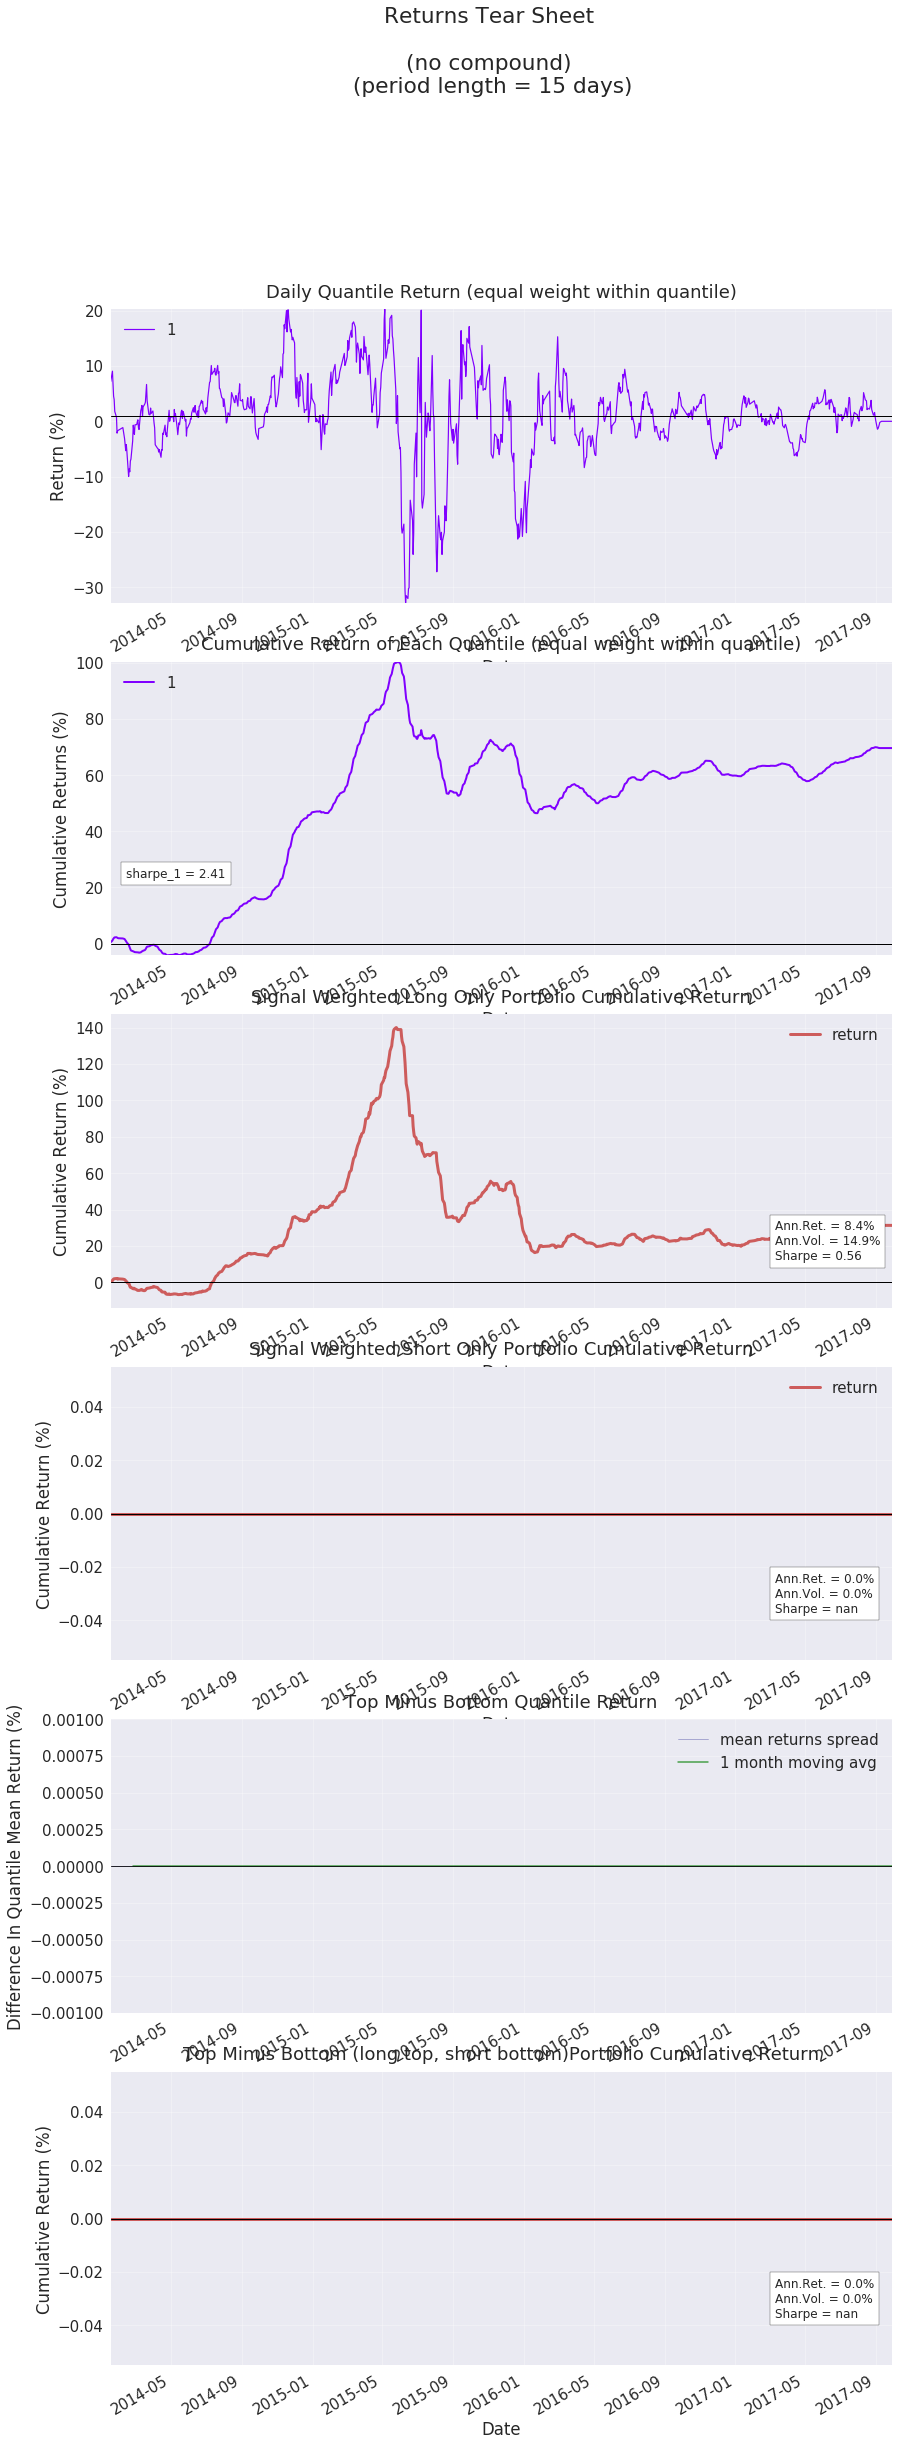

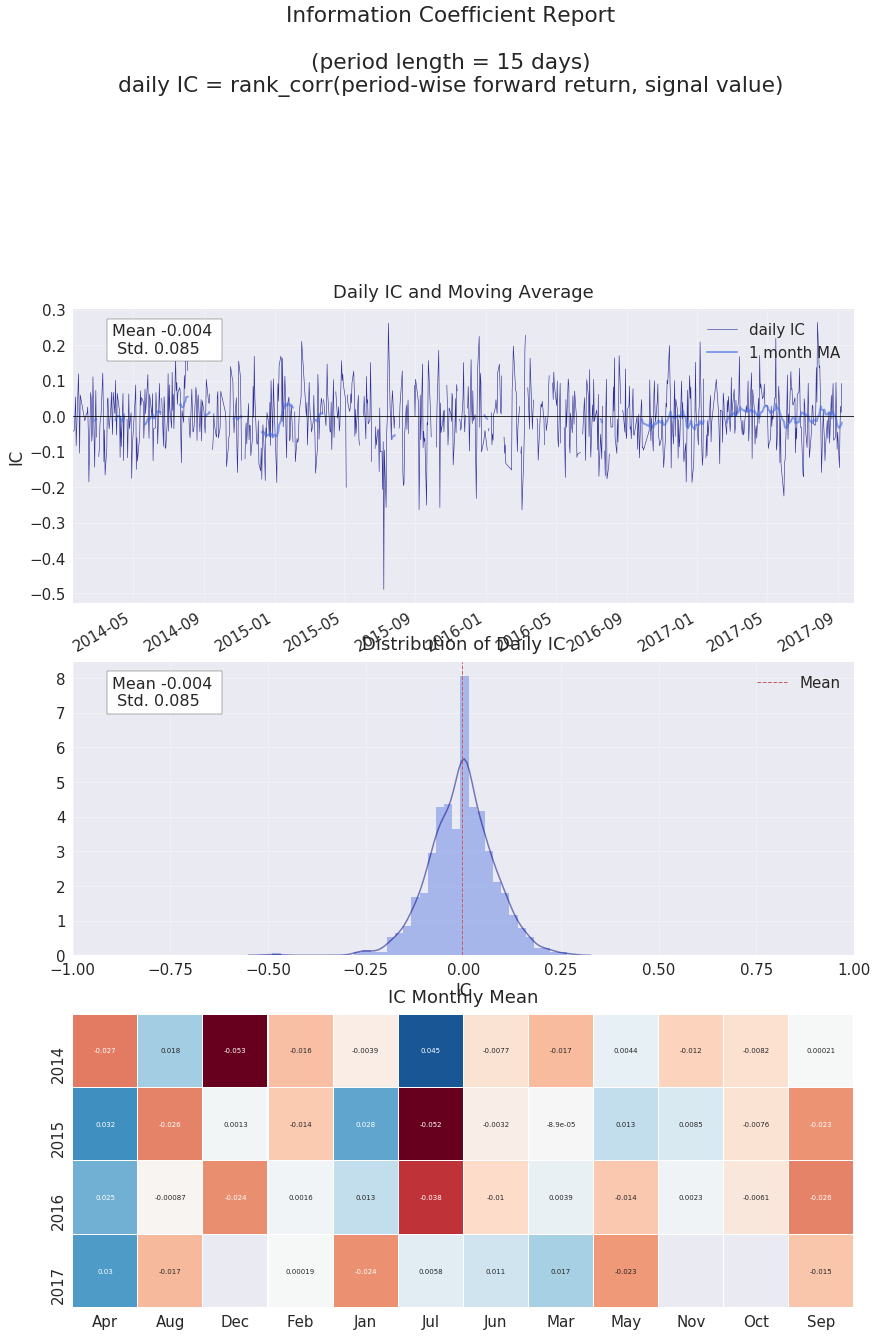

In [21]:
# 可视化
import matplotlib.pyplot as plt
obj.create_full_report()
plt.show()